In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
import cv2

%matplotlib inline

from keras import backend as K

K.set_image_dim_ordering('th')

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')

x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

In [39]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), input_shape=(1, 28, 28), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax', name='predict'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               48128     
__________

In [40]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.4645 - acc: 0.8485 - val_loss: 0.0925 - val_acc: 0.9703
Epoch 2/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.1081 - acc: 0.9667 - val_loss: 0.0591 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0776 - acc: 0.9767 - val_loss: 0.0590 - val_acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0624 - acc: 0.9812 - val_loss: 0.0402 - val_acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0533 - acc: 0.9830 - val_loss: 0.0354 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0419 - acc: 0.9869 - val_loss: 0.0281 - 

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))


acc: 99.18%


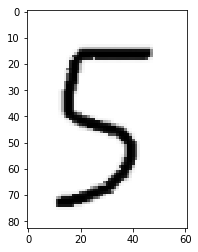

In [51]:
img_pred = cv2.imread("number-five.png", 0)

plt.imshow(img_pred, cmap='gray')

In [52]:
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)
    
img_pred = img_pred.reshape(1, 1, 28, 28)

In [53]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)

pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)

print(pred[0], "com probabilidade de ", pred_proba)

5 com probabilidade de  100.00%
